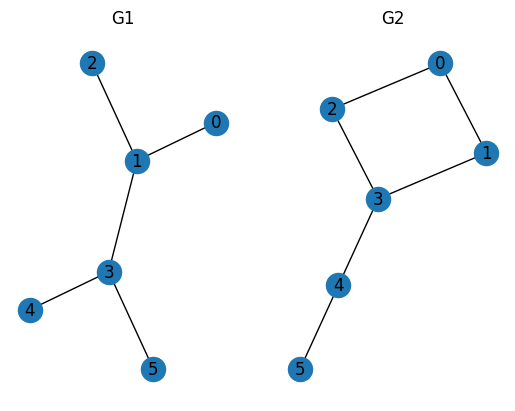

measures(G1) = [1.67, 3.67, 0.89, 0.0, 1.93, -0.67]
measures(G2) = [2.0, 4.33, 0.33, 0.0, 1.93, -0.09]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

A1 = np.array([
#    0 1 2 3 4 5
    [0,1,0,0,0,0], # 0
    [1,0,1,1,0,0], # 1
    [0,1,0,0,0,0], # 2
    [0,1,0,0,1,1], # 3
    [0,0,0,1,0,0], # 4
    [0,0,0,1,0,0]  # 5
    ]) 
G1 = nx.from_numpy_array(np.array(A1), create_using=nx.Graph)  

A2 = np.array([
#    0 1 2 3 4 5
    [0,1,1,0,0,0], # 0
    [1,0,0,1,0,0], # 1
    [1,0,0,1,0,0], # 2
    [0,1,1,0,1,0], # 3
    [0,0,0,1,0,1], # 4
    [0,0,0,0,1,0]  # 5
    ]) 
G2 = nx.from_numpy_array(np.array(A2), create_using=nx.Graph)  

plt.subplot(1,2,1)
plt.title("G1")
nx.draw_kamada_kawai(G1,with_labels=True)
plt.subplot(1,2,2)
plt.title("G2")
nx.draw_kamada_kawai(G2,with_labels=True)
plt.show()

def measures(G):
    def momment_of_degree_distribution(G,m):
        M = 0
        N = len(G)
        for i in G.nodes:
            M = M + G.degree(i)**m
        M = M/N
        return M

    vk = dict(G.degree())
    vk = list(vk.values())
    vk = np.array(vk)
    k1 = momment_of_degree_distribution(G,1)
    k2 = momment_of_degree_distribution(G,2)
    variance = momment_of_degree_distribution(G,2) - momment_of_degree_distribution(G,1)**2
    av_cl = nx.average_clustering(G)
    l = nx.average_shortest_path_length(G)
    r=nx.degree_assortativity_coefficient(G)

    return  k1, k2, variance, av_cl, l, r

results_G1 = measures(G1)
results_G2 = measures(G2)

print(f"measures(G1) = {[round(result, 2) for result in results_G1]}")
print(f"measures(G2) = {[round(result, 2) for result in results_G2]}")